# (7주차) 10월13일 
> 딥러닝의 기초 - 깊은신경망(4)-- 드랍아웃

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-xIaM33fBWd9bCF_FsXlg2f

## imports

In [3]:
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt

## 지난시간리뷰 

### 데이터

`-` model: $y_i = (0\times x_i) + \epsilon_i$

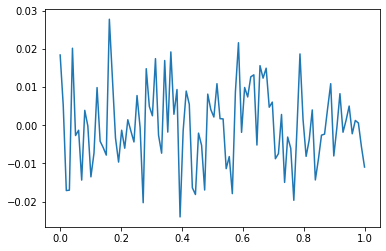

In [4]:
torch.manual_seed(5) 
x=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01
plt.plot(x,y)

### 모든 데이터를 사용하여 적합 (512, relu, 1000 epochs) 

In [7]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

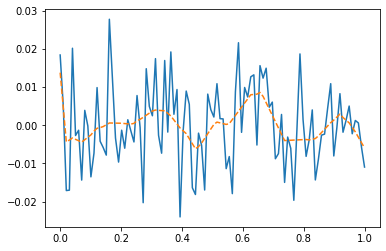

In [9]:
plt.plot(x,y)
plt.plot(x,net(x).data, '--')

### 전체데이터를 8:2로 나누어서 8만을 학습

`-` 데이터를 8:2로 나눈다

In [13]:
xtr = x[:80]
ytr = y[:80] 
xtest = x[80:] 
ytest = y[80:] 

In [16]:
x.shape, xtr.shape, xtest.shape

(torch.Size([100, 1]), torch.Size([80, 1]), torch.Size([20, 1]))

In [17]:
y.shape, ytr.shape, ytest.shape

(torch.Size([100, 1]), torch.Size([80, 1]), torch.Size([20, 1]))

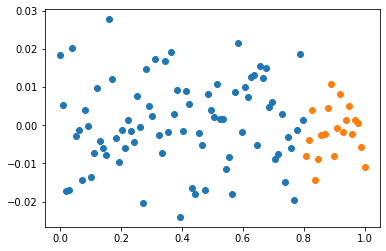

In [22]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')

`-` (xtr,ytr) 만 가지고 net를 학습시킨다. 

In [18]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    #
    ## 2 
    loss = loss_fn(net(xtr),ytr) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

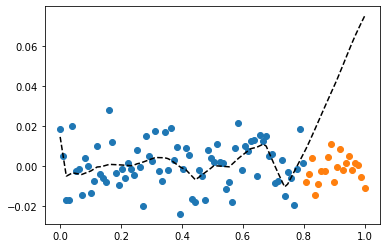

In [27]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 

## 드랍아웃 

### 오버피팅의 해결 

`-` 오버피팅의 해결책: 드랍아웃 

In [81]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    #
    ## 2 
    loss = loss_fn(net(xtr),ytr) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'network is in training mode')

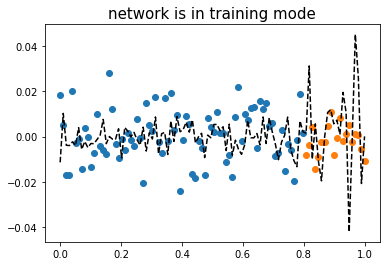

In [82]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 
plt.title(r"network is in training mode",fontsize=15)

`-` 올바른 사용법 

In [83]:
net.training

True

In [84]:
net.eval()
net.training

False

Text(0.5, 1.0, 'network is in evaluation mode')

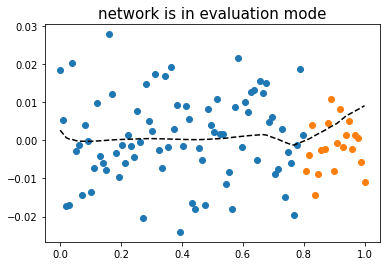

In [85]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 
plt.title(r"network is in evaluation mode",fontsize=15)

### 드랍아웃 레이어 

In [86]:
_x = torch.linspace(0,1,101) 
_x 

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900, 1.0000])

In [87]:
dout = torch.nn.Dropout(0.9)
dout(_x)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.4000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 2.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 3.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 4.7000, 0.0000, 4.9000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 5.8000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 7.5000, 7.6000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 8.5000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

- 90%의 드랍아웃: 드랍아웃층의 입력 중 임의로 90%를 골라서 결과를 0으로 만든다. + 그리고 0이 되지않고 살아남은 값들은 10배 만큼 값이 커진다. 

`-` 드랍아웃레이어 정리 
- 구조: 입력 -> 드랍아웃레이어 -> 출력 
- 역할: (1) 입력의 일부를 임의로 0으로 만드는 역할 (2) 0이 안된것들은 스칼라배하여 드랍아웃을 통과한 모든 숫자들의 총합이 일정하게 되도록 조정 
- 효과: 오버피팅을 억제하는 효과가 있음 (왜??) 
- 의미: each iteration (each epoch x) 마다 학습에 참여하는 노드가 로테이션으로 랜덤으로 결정됨. 
- 느낌: 모든 노드가 골고루 학습가능 + 한 두개의 특화된 능력치가 개발되기 보다 평균적인 능력치가 전반적으로 개선됨 